### Import the dataset, explore for dimensionality, and type and average value of the horsepower across all the cars.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_excel("mtcars.xlsx")
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [4]:
df.shape

(32, 12)

In [5]:
df['hp'].dtype

dtype('int64')

In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df['gear'].unique()

array([4, 3, 5], dtype=int64)

In [8]:
df['model'].values

array(['Mazda RX4', 'Mazda RX4 Wag', 'Datsun 710', 'Hornet 4 Drive',
       'Hornet Sportabout', 'Valiant', 'Duster 360', 'Merc 240D',
       'Merc 230', 'Merc 280', 'Merc 280C', 'Merc 450SE', 'Merc 450SL',
       'Merc 450SLC', 'Cadillac Fleetwood', 'Lincoln Continental',
       'Chrysler Imperial', 'Fiat 128', 'Honda Civic', 'Toyota Corolla',
       'Toyota Corona', 'Dodge Challenger', 'AMC Javelin', 'Camaro Z28',
       'Pontiac Firebird', 'Fiat X1-9', 'Porsche 914-2', 'Lotus Europa',
       'Ford Pantera L', 'Ferrari Dino', 'Maserati Bora', 'Volvo 142E'],
      dtype=object)

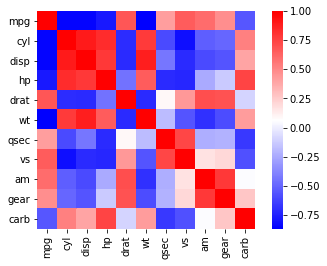

In [9]:
correlation = df.corr()
sns.heatmap(data = correlation, square = True, cmap = 'bwr')

In [10]:
df[['vs','hp']].groupby('vs').describe()

hp                                                           
   count        mean        std   min     25%    50%     75%    max
vs                                                                 
0   18.0  189.722222  60.281502  91.0  156.25  180.0  226.25  335.0
1   14.0   91.357143  24.424474  52.0   66.00   96.0  109.75  123.0

In [11]:
df[['disp','gear']].corr()

,disp,gear
disp,1.000000,-0.555569
gear,-0.555569,1.000000


### Check for missing values and outliers within the horsepower column and remove them.

In [12]:
df.isna().any()

model    False
mpg      False
cyl      False
disp     False
hp       False
drat     False
wt       False
qsec     False
vs       False
am       False
gear     False
carb     False
dtype: bool

##### Replace the missing value with mean value
 #from sklearn.preprocessing import Imputer
 #mean_imputer = Imputer(missing_values = np.nan,strategy = 'mean',axis = 1)
 #mean_imputer = mean_imputer.fit(df)
 #imputed_df = mean_imputer.transform(df.values)
 #df = pd.DataFrame(data = imputed_df, columns = cols)
 #df

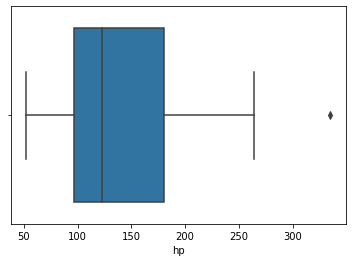

In [13]:
sns.boxplot(x = df['hp'])

In [14]:
filtered = df['hp'].values > 250
df_outlier = df[filtered]
df_outlier

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.17,14.5,0,1,5,4
30,Maserati Bora,15.0,8,301.0,335,3.54,3.57,14.6,0,1,5,8
